In [1]:
import warnings
warnings.filterwarnings('ignore')

Чтение файла построчно:

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
Создание DataFrame:

Python
df = pd.DataFrame(lines, columns=['text'])
Удаление символов новой строки и пробелов по краям, замена пустых строк на NaN:
Мы используем метод str.strip для удаления символов новой строки и пробелов по краям, затем заменяем пустые строки на pd.NA.

df['text'] = df['text'].str.strip().replace('', pd.NA)

Удаление строк с NaN значениями в столбце text:
Мы используем метод dropna для удаления строк, где в столбце text находятся значения NaN.

df = df.dropna(subset=['text'])

Добавление индексного столбца id:
Пересоздаем индексы DataFrame с помощью reset_index и добавляем индексный столбец id.

df.reset_index(inplace=True, drop=True)
df.insert(0, 'id', df.index)

Сохраняем очищенный текст в новый CSV файл с индексным столбцом.

cleaned_file_path = r'f:\chatepc\chatalx\work\data\poslanie_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

Этот код удаляет строки, содержащие NaN значения в столбце text, и сохраняет результат в новый файл. Если у вас возникнут дополнительные вопросы или потребуется помощь с другими задачами, дайте знать!

In [7]:
import pandas as pd

# Путь к файлу
file_path = r'f:\chatepc\chatalx\work\data\poslanie.txt'

# Чтение файла построчно
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Создание DataFrame
df = pd.DataFrame(lines, columns=['text'])

# Удаление символов новой строки '\n' и пустых строк
df['text'] = df['text'].str.strip().replace('', pd.NA).dropna()

# Добавление индексного столбца 'id'
df.reset_index(inplace=True)
df.rename(columns={'index': 'id'}, inplace=True)



# Пример вывода первых 5 строк очищенного текста
df.head(20)

# Сохранение очищенного текста в новый файл
# cleaned_file_path = r'f:\chatepc\chatalx\work\data\poslanie_cleaned.txt'
# df.to_csv(cleaned_file_path, sep='\n', index=False, header=False)

,id,text
0,0,15 января 2020 года
1,1,----------------------------------------------...
2,2,NaN
3,3,ПОСЛАНИЕ
4,4,NaN
5,5,ПРЕЗИДЕНТА РОССИЙСКОЙ ФЕДЕРАЦИИ
6,6,NaN
7,7,ФЕДЕРАЛЬНОМУ СОБРАНИЮ РОССИЙСКОЙ ФЕДЕРАЦИИ
8,8,NaN
9,9,ПОСЛАНИЕ ПРЕЗИДЕНТА ФЕДЕРАЛЬНОМУ СОБРАНИЮ


In [10]:
# df['text'] = df['text'].str.replace('NaN',")
# df['text'] = df['text'].fillna('')
df_clean = df.dropna()
df_clean.head(20)

,id,text
0,0,15 января 2020 года
1,1,----------------------------------------------...
2,2,
3,3,ПОСЛАНИЕ
4,4,
5,5,ПРЕЗИДЕНТА РОССИЙСКОЙ ФЕДЕРАЦИИ
6,6,
7,7,ФЕДЕРАЛЬНОМУ СОБРАНИЮ РОССИЙСКОЙ ФЕДЕРАЦИИ
8,8,
9,9,ПОСЛАНИЕ ПРЕЗИДЕНТА ФЕДЕРАЛЬНОМУ СОБРАНИЮ


In [14]:
import string

df['text'] = df['text'].str.translate(str.maketrans('', '', string.punctuation)) # Удаление пунктуации

In [15]:
# Приведение всех строк к нижнему регистру
df['text'] = df['text'].str.lower()

# Список стоп-слов
stopwords = set(["и", "в", "во", "не", "что", "он", "на", "я", "с", "со", "как", "а", "то", "все", "она", "так", "его", "но", "да", "ты", "к", "у", "же", "вы", "за", "бы", "по", "только", "ее", "мне", "было", "вот", "от", "меня", "еще", "нет", "о", "из", "ему", "теперь", "когда", "даже", "ну", "вдруг", "ли", "если", "уже", "или", "ни", "быть", "был", "него", "до", "вас", "нибудь", "опять", "уж", "вам", "ведь", "там", "потом", "себя", "ничего", "ей", "может", "они", "тут", "где", "есть", "надо", "ней", "для", "мы", "тебя", "их", "чем", "была", "сам", "чтоб", "без", "будто", "чего", "раз", "тоже", "себе", "под", "жизнь", "будет", "ж", "тогда", "кто", "этот", "говорил", "того", "потому", "этого", "какой", "совсем", "ним", "здесь", "этом", "один", "почти", "мой", "тем", "чтобы", "нее", "кажется", "сейчас", "были", "куда", "зачем", "сказать", "всех", "никогда", "сегодня", "можно", "при", "наконец", "два", "об", "другой", "хоть", "после", "над", "больше", "тот", "через", "эти", "нас", "про", "них", "какая", "много", "разве", "три", "эту", "моя", "впрочем", "хорошо", "свою", "этой", "перед", "иногда", "лучше", "чуть", "том", "нельзя", "такой", "им", "более", "всегда", "конечно", "всю", "между"])

# Очистка текста от стоп-слов
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

# Удаление цифр и пунктуации
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)  # Удаление цифр
  

In [16]:
df.sample(10)

,id,text
3,3,послание
161,161,наступивший год многом рубежный это переход тр...
102,102,пятое уверенного роста инвестиций экономике ну...
96,96,первое договорились течение шести лет менять н...
53,53,напомню также льготную ставку ипотеки шесть пр...
162,162,благодарю внимание
83,83,касается ординатуры предлагаю самым дефицитным...
45,45,году также обращаясь посланием федеральному со...
165,165,января года
28,28,причем разным оценкам порядка процентов семей ...


In [17]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
# Объединение всех строк в один текст
text = ' '.join(df['text'])


In [19]:
# Найдем самые частые слова
word_counts = Counter(text.split())
most_common_words = word_counts.most_common(20)

# Найдем самые частые двухсловные и трехсловные словосочетания
def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])

bigrams = Counter(find_ngrams(text.split(), 2)).most_common(20)
trigrams = Counter(find_ngrams(text.split(), 3)).most_common(20)

# Вывод результатов
print("Топ-20 самых частых слов:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

print("\nТоп-20 самых частых двухсловных словосочетаний:")
for bigram, freq in bigrams:
    print(f"{' '.join(bigram)}: {freq}")

Топ-20 самых частых слов:
это: 77
должны: 36
россии: 34
страны: 30
года: 26
федерации: 25
нужно: 24
граждан: 22
уважаемые: 21
году: 21
коллеги: 20
которые: 19
считаю: 19
семьи: 16
связи: 16
конституции: 16
также: 15
прошу: 14
сделать: 14
предлагаю: 14

Топ-20 самых частых двухсловных словосочетаний:
уважаемые коллеги: 18
российской федерации: 9
прежде всего: 7
прошу правительство: 7
считаю необходимым: 7
наших граждан: 6
связи предлагаю: 6
государственной думы: 5
прожиточного минимума: 5
председателя правительства: 5
января года: 4
федеральному собранию: 4
нашей страны: 4
федерального бюджета: 4
имею виду: 4
нужно создать: 4
нужно сделать: 4
тысяч рублей: 4
субъектах федерации: 4
президента российской: 3


In [20]:
print("\nТоп-20 самых частых трехсловных словосочетаний:")
for trigram, freq in trigrams:
    print(f"{' '.join(trigram)}: {freq}")


Топ-20 самых частых трехсловных словосочетаний:
президента российской федерации: 3
середине наступающего десятилетия: 3
хочу это подчеркнуть: 3
всей территории страны: 3
взять большую ответственность: 3
члены совета федерации: 2
совета федерации депутаты: 2
федерации депутаты государственной: 2
депутаты государственной думы: 2
пять десять лет: 2
нашей страны мало: 2
время великой отечественной: 2
великой отечественной войны: 2
семьи двумя детьми: 2
главы субъектов федерации: 2
семьи чьи доходы: 2
чьи доходы превышают: 2
детей возрасте трех: 2
возрасте трех семи: 2
трех семи лет: 2


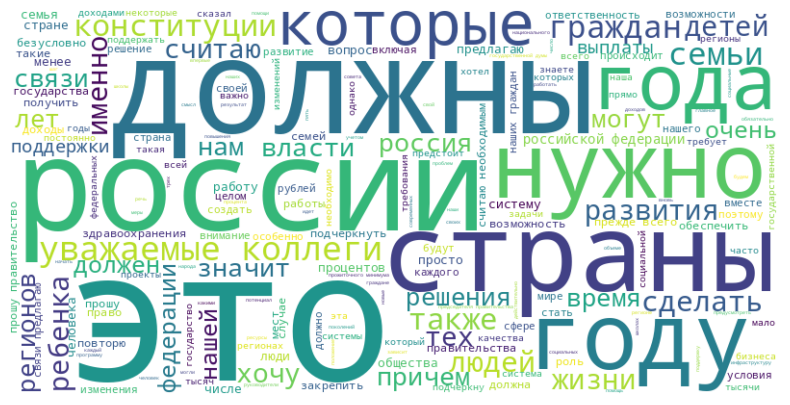

In [21]:
# Создание облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
# Подсчет частоты каждого слова
word_counts = Counter(text.split())

# Создание нового DataFrame с уникальными словами и их частотой
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])

# Сортировка по частоте
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Пример вывода первых 20 строк
print(word_freq_df.head(20))

# Сохранение нового DataFrame в файл

# word_freq_file_path = r'f:\chatepc\chatalx\work\data\word_frequency.csv'
# word_freq_df.to_csv(word_freq_file_path, index=False)

           word  frequency
0           это         77
1        должны         36
2        россии         34
3        страны         30
4          года         26
5     федерации         25
6         нужно         24
7       граждан         22
8          году         21
9     уважаемые         21
10      коллеги         20
11      которые         19
12       считаю         19
13        семьи         16
14        связи         16
15  конституции         16
16        также         15
17    предлагаю         14
18        прошу         14
19        людей         14


Топ-20 самых частых слов:
           word  frequency
0           это         77
1        должны         36
2        россии         34
3        страны         30
4          года         26
5     федерации         25
6         нужно         24
7       граждан         22
8          году         21
9     уважаемые         21
10      коллеги         20
11      которые         19
12       считаю         19
13        семьи         16
14        связи         16
15  конституции         16
16        также         15
17    предлагаю         14
18        прошу         14
19        людей         14

Топ-20 самых частых биграмм:
                        bigram  frequency
0            уважаемые коллеги         18
1         российской федерации          9
2                 прежде всего          7
3           считаю необходимым          7
4          прошу правительство          7
5              связи предлагаю          6
6                наших граждан          6
7   председателя правительства          5

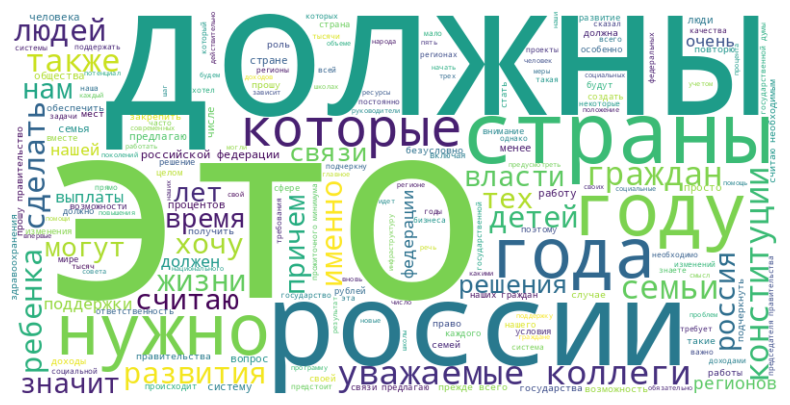

In [25]:

# Объединение всех строк в один текст
text = ' '.join(df['text'])

# Подсчет частоты каждого слова
word_counts = Counter(text.split())

# Создание нового DataFrame с уникальными словами и их частотой
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])

# Сортировка по частоте
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Пример вывода первых 20 строк
print("Топ-20 самых частых слов:")
print(word_freq_df.head(20))

# Подсчет частоты биграмм
def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])

bigrams = Counter(find_ngrams(text.split(), 2))

# Создание нового DataFrame с биграммами и их частотой
bigram_freq_df = pd.DataFrame(bigrams.items(), columns=['bigram', 'frequency'])

# Преобразование биграмм из кортежей в строки
bigram_freq_df['bigram'] = bigram_freq_df['bigram'].apply(lambda x: ' '.join(x))

# Сортировка по частоте
bigram_freq_df = bigram_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Пример вывода первых 20 строк
print("\nТоп-20 самых частых биграмм:")
print(bigram_freq_df.head(20))

# Сохранение новых DataFrame в файлы
# word_freq_file_path = r'f:\chatepc\chatalx\work\data\word_frequency.csv'
# word_freq_df.to_csv(word_freq_file_path, index=False)

bigram_freq_file_path = r'f:\chatepc\chatalx\work\data\bigram_frequency.csv'
bigram_freq_df.to_csv(bigram_freq_file_path, index=False)

# Создание облака слов
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
import pandas as pd
from collections import Counter
import string

# Путь к файлу
file_path = r'f:\chatepc\chatalx\work\data\poslanie.txt'

# Чтение файла построчно
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Создание DataFrame
df = pd.DataFrame(lines, columns=['text'])

# Удаление символов новой строки '\n' и пробелов по краям, замена пустых строк на NaN
df['text'] = df['text'].str.strip().replace('', pd.NA)

# Удаление строк с NaN значениями в столбце 'text'
df = df.dropna(subset=['text'])

# Добавление индексного столбца 'id'
df.reset_index(inplace=True, drop=True)
df.insert(0, 'id', df.index)

# Приведение всех строк к нижнему регистру
df['text'] = df['text'].str.lower()

# Список стоп-слов
stopwords = set(["и", "в", "во", "не", "что", "он", "на", "я", "с", "со", "как", "а", "то", "все", "она", "так", "его", "но", "да", "ты", "к", "у", "же", "вы", "за", "бы", "по", "только", "ее", "мне", "было", "вот", "от", "меня", "еще", "нет", "о", "из", "ему", "теперь", "когда", "даже", "ну", "вдруг", "ли", "если", "уже", "или", "ни", "быть", "был", "него", "до", "вас", "нибудь", "опять", "уж", "вам", "ведь", "там", "потом", "себя", "ничего", "ей", "может", "они", "тут", "где", "есть", "надо", "ней", "для", "мы", "тебя", "их", "чем", "была", "сам", "чтоб", "без", "будто", "чего", "раз", "тоже", "себе", "под", "жизнь", "будет", "ж", "тогда", "кто", "этот", "говорил", "того", "потому", "этого", "какой", "совсем", "ним", "здесь", "этом", "один", "почти", "мой", "тем", "чтобы", "нее", "кажется", "сейчас", "были", "куда", "зачем", "сказать", "всех", "никогда", "сегодня", "можно", "при", "наконец", "два", "об", "другой", "хоть", "после", "над", "больше", "тот", "через", "эти", "нас", "про", "них", "какая", "много", "разве", "три", "эту", "моя", "впрочем", "хорошо", "свою", "этой", "перед", "иногда", "лучше", "чуть", "том", "нельзя", "такой", "им", "более", "всегда", "конечно", "всю", "между"])

# Очистка текста от стоп-слов
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

# Удаление цифр и пунктуации
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)  # Удаление цифр
df['text'] = df['text'].str.translate(str.maketrans('', '', string.punctuation))  # Удаление пунктуации

# Объединение всех строк в один текст
text = ' '.join(df['text'])

# Подсчет частоты биграмм
def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])

bigrams = Counter(find_ngrams(text.split(), 2))

# Создание нового DataFrame с биграммами и их частотой
bigram_freq_df = pd.DataFrame(bigrams.items(), columns=['bigram', 'frequency'])

# Преобразование биграмм из кортежей в строки
bigram_freq_df['bigram'] = bigram_freq_df['bigram'].apply(lambda x: ' '.join(x))

# Сортировка по частоте
bigram_freq_df = bigram_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Пример вывода первых 20 строк
print("Топ-20 самых частых биграмм:")
print(bigram_freq_df.head(20))

# Сохранение нового DataFrame в файл
bigram_freq_file_path = r'f:\chatepc\chatalx\work\data\bigram_frequency.csv'
bigram_freq_df.to_csv(bigram_freq_file_path, index=False)

Топ-20 самых частых биграмм:
                        bigram  frequency
0            уважаемые коллеги         18
1         российской федерации          9
2           считаю необходимым          7
3          прошу правительство          7
4                 прежде всего          7
5                наших граждан          6
6              связи предлагаю          6
7         государственной думы          5
8   председателя правительства          5
9        прожиточного минимума          5
10               нужно сделать          4
11                   имею виду          4
12                тысяч рублей          4
13         субъектах федерации          4
14        федерального бюджета          4
15                 января года          4
16               нужно создать          4
17                нашей страны          4
18       федеральному собранию          4
19            рождении второго          3


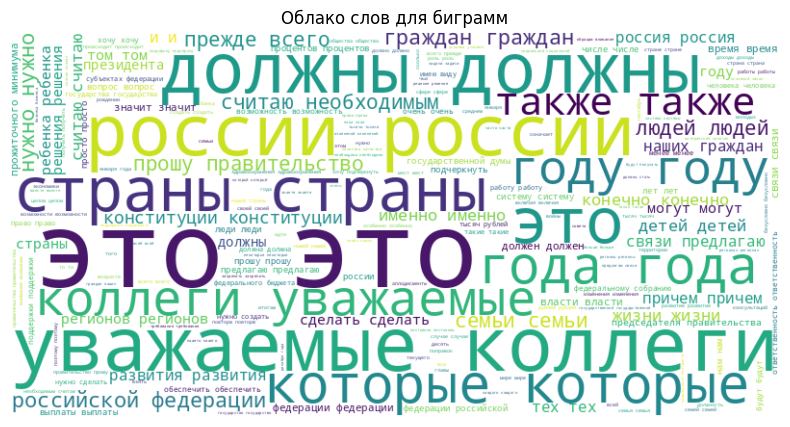

In [27]:
# Создание текста из биграмм для облака слов
bigram_text = ' '.join([' '.join(bigram) for bigram, freq in bigrams.items() for _ in range(freq)])

# Создание и отображение облака слов для биграмм
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)

plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для биграмм')
plt.show()

In [28]:
# Подсчет частоты триграмм
trigrams = Counter(find_ngrams(text.split(), 3))

# Создание нового DataFrame с триграммами и их частотой
trigram_freq_df = pd.DataFrame(trigrams.items(), columns=['trigram', 'frequency'])

# Преобразование триграмм из кортежей в строки
trigram_freq_df['trigram'] = trigram_freq_df['trigram'].apply(lambda x: ' '.join(x))

# Сортировка по частоте
trigram_freq_df = trigram_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Пример вывода первых 20 строк
print("Топ-20 самых частых триграмм:")
print(trigram_freq_df.head(20))

# Сохранение нового DataFrame в файл
trigram_freq_file_path = r'f:\chatepc\chatalx\work\data\trigram_frequency.csv'
trigram_freq_df.to_csv(trigram_freq_file_path, index=False)

Топ-20 самых частых триграмм:
                                       trigram  frequency
0            середине наступающего десятилетия          3
1                взять большую ответственность          3
2              президента российской федерации          3
3                         хочу это подчеркнуть          3
4                       всей территории страны          3
5                           семьи двумя детьми          2
6              должность президента российской          2
7               консультаций советом федерации          2
8                  великой отечественной войны          2
9                  реального сектора экономики          2
10                   главы субъектов федерации          2
11                          возрасте трех семи          2
12                           нашей страны мало          2
13  ответственность формирование правительства          2
14                         детей возрасте трех          2
15                        чьи доходы превы

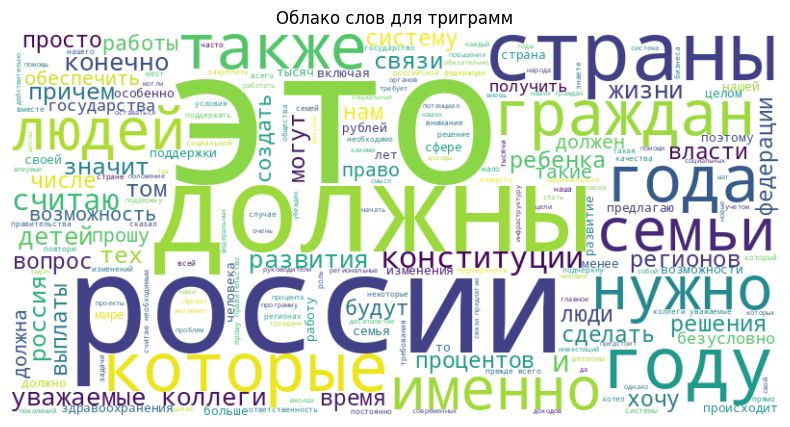

In [29]:
# Создание текста из триграмм для облака слов
trigram_text = ' '.join([' '.join(trigram) for trigram, freq in trigrams.items() for _ in range(freq)])

# Создание и отображение облака слов для триграмм
trigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trigram_text)

plt.figure(figsize=(10, 5))
plt.imshow(trigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для триграмм')
plt.show()

Конечно, давайте добавим код для создания облака слов из биграмм. Я покажу только тот кусок кода, который нужно добавить.

Дополните код для создания облака слов из биграмм:
Python
# Создание текста из биграмм для облака слов
bigram_text = ' '.join([' '.join(bigram) for bigram, freq in bigrams.items() for _ in range(freq)])

# Создание и отображение облака слов для биграмм
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)

plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для биграмм')
plt.show()
Объяснение:
Создание текста из биграмм для облака слов:

bigram_text создается из всех биграмм, где каждая биграмма многократно добавляется в текст в зависимости от ее частоты.
Python
bigram_text = ' '.join([' '.join(bigram) for bigram, freq in bigrams.items() for _ in range(freq)])
Создание и отображение облака слов для биграмм:

WordCloud используется для создания облака слов на основе текста bigram_text.
plt.figure и plt.imshow используются для отображения облака слов.

In [32]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Убедитесь, что необходимые пакеты nltk загружены
nltk.download('punkt')

# Пример текста (здесь должен быть ваш текст "Послание")
file_path = r'f:\chatepc\chatalx\work\data\poslanie.txt'

# Чтение файла построчно
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Объединение текста в один большой текст для анализа
text = ' '.join(lines)
# Разделение текста на предложения
sentences = sent_tokenize(text)

# Создание DataFrame с предложениями
df = pd.DataFrame(sentences, columns=['sentence'])

# Подсчет количества слов и символов в каждом предложении
df['word_count'] = df['sentence'].apply(lambda x: len(word_tokenize(x)))
df['char_count'] = df['sentence'].apply(lambda x: len(x))

# Подсчет средней длины предложений, слов и символов
average_sentence_length = df['word_count'].mean()
average_word_length = df['char_count'].mean() / df['word_count'].mean()

print(f"Средняя длина предложения (в словах): {average_sentence_length:.2f}")
print(f"Средняя длина слова (в символах): {average_word_length:.2f}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Средняя длина предложения (в словах): 19.72
Средняя длина слова (в символах): 6.14


In [31]:
import pandas as pd

# # Пример текста
# text = """
# Уважаемые коллеги! Сегодня мы обсуждаем важные вопросы. 
# Наши достижения и планы на будущее. Это важный момент для нас.
# """
# Путь к файлу
file_path = r'f:\chatepc\chatalx\work\data\poslanie.txt'

# Чтение файла построчно
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Объединение текста в один большой текст для анализа
text = ' '.join(lines)
# Разделение текста на предложения
sentences = text.split('.')
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

# Создание DataFrame с предложениями
df = pd.DataFrame(sentences, columns=['sentence'])

# Подсчет количества слов и символов в каждом предложении
df['word_count'] = df['sentence'].apply(lambda x: len(x.split()))
df['char_count'] = df['sentence'].apply(lambda x: len(x))

# Подсчет средней длины предложений, слов и символов
average_sentence_length = df['word_count'].mean()
average_word_length = df['char_count'].mean() / df['word_count'].mean()

print(f"Средняя длина предложения (в словах): {average_sentence_length:.2f}")
print(f"Средняя длина слова (в символах): {average_word_length:.2f}")

Средняя длина предложения (в словах): 17.46
Средняя длина слова (в символах): 7.23


In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Путь к файлу
file_path = r'f:\chatepc\chatalx\work\data\poslanie.txt'

# Чтение файла
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Создание списка документов (в данном случае у нас один документ)
documents = [text]

# Создание объекта TfidfVectorizer
vectorizer = TfidfVectorizer()

# Преобразование текста в матрицу TF-IDF
tfidf_matrix = vectorizer.fit_transform(documents)

# Получение словарного запаса (всех уникальных слов)
feature_names = vectorizer.get_feature_names_out()

# Преобразование матрицы TF-IDF в DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=feature_names, columns=["TF-IDF"])

# Сортировка DataFrame по значениям TF-IDF
tfidf_df = tfidf_df.sort_values(by="TF-IDF", ascending=False)

# Пример вывода первых 20 строк
print("Топ-20 ключевых слов по TF-IDF:")
print(tfidf_df.head(20))

# Сохранение DataFrame в файл
tfidf_file_path = r'f:\chatepc\chatalx\work\data\tfidf_analysis.csv'
tfidf_df.to_csv(tfidf_file_path)

Топ-20 ключевых слов по TF-IDF:
             TF-IDF
на         0.362563
не         0.328359
что        0.290735
это        0.263371
для        0.242849
по         0.191543
мы         0.171020
но         0.136816
должны     0.123135
уже        0.119714
россии     0.116294
страны     0.106033
как        0.099192
года       0.088931
то         0.088931
за         0.088931
федерации  0.085510
все        0.085510
при        0.085510
этом       0.082090


In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Путь к файлу
file_path = r'f:\chatepc\chatalx\work\data\poslanie.txt'

# Чтение файла
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Создание списка документов (в данном случае у нас один документ)
documents = [text]

# Создание объекта TfidfVectorizer для биграмм
vectorizer = TfidfVectorizer(ngram_range=(2, 2))

# Преобразование текста в матрицу TF-IDF для биграмм
tfidf_matrix = vectorizer.fit_transform(documents)

# Получение словарного запаса (всех уникальных биграмм)
feature_names = vectorizer.get_feature_names_out()

# Преобразование матрицы TF-IDF в DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=feature_names, columns=["TF-IDF"])

# Сортировка DataFrame по значениям TF-IDF
tfidf_df = tfidf_df.sort_values(by="TF-IDF", ascending=False)

# Пример вывода первых 20 строк
print("Топ-20 ключевых биграмм по TF-IDF:")
print(tfidf_df.head(20))

# Сохранение DataFrame в файл
tfidf_file_path = r'f:\chatepc\chatalx\work\data\tfidf_bigrams_analysis.csv'
tfidf_df.to_csv(tfidf_file_path)

Топ-20 ключевых биграмм по TF-IDF:
                        TF-IDF
уважаемые коллеги     0.185135
не только             0.133708
этой связи            0.123423
при этом              0.113138
мы должны             0.102853
российской федерации  0.092567
том числе             0.082282
не менее              0.082282
прошу правительство   0.071997
считаю необходимым    0.071997
прежде всего          0.071997
должны быть           0.071997
тех кто               0.071997
считаю что            0.071997
потому что            0.061712
наших граждан         0.061712
связи предлагаю       0.061712
том что               0.061712
2020 года             0.051426
государственной думы  0.051426


In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Путь к файлу
file_path = r'f:\chatepc\chatalx\work\data\poslanie.txt'

# Чтение файла
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Создание списка документов (в данном случае у нас один документ)
documents = [text]

# Создание объекта TfidfVectorizer для триграмм
vectorizer = TfidfVectorizer(ngram_range=(3, 3))

# Преобразование текста в матрицу TF-IDF для триграмм
tfidf_matrix = vectorizer.fit_transform(documents)

# Получение словарного запаса (всех уникальных триграмм)
feature_names = vectorizer.get_feature_names_out()

# Преобразование матрицы TF-IDF в DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=feature_names, columns=["TF-IDF"])

# Сортировка DataFrame по значениям TF-IDF
tfidf_df = tfidf_df.sort_values(by="TF-IDF", ascending=False)

# Пример вывода первых 20 строк
print("Топ-20 ключевых триграмм по TF-IDF:")
print(tfidf_df.head(20))

# Сохранение DataFrame в файл
tfidf_file_path = r'f:\chatepc\chatalx\work\data\tfidf_trigrams_analysis.csv'
tfidf_df.to_csv(tfidf_file_path)

Топ-20 ключевых триграмм по TF-IDF:
                                      TF-IDF
этой связи предлагаю                0.071714
января 2020 года                    0.047809
но это не                           0.035857
президента российской федерации     0.035857
хочу это подчеркнуть                0.035857
тем не менее                        0.035857
большую ответственность за          0.035857
всей территории страны              0.035857
как уже сказал                      0.035857
середине наступающего десятилетия   0.035857
до сих пор                          0.023905
взять на себя                       0.023905
причем не только                    0.023905
на детей возрасте                   0.023905
до семи лет                         0.023905
до 31 декабря                       0.023905
уважаемые коллеги хочу              0.023905
федерации депутаты государственной  0.023905
члены совета федерации              0.023905
тех кто находится                   0.023905
